In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mne

In [3]:
raw = mne.io.read_raw_edf('SC4001E0-PSG (2).edf')
annot = mne.read_annotations('SC4001EC-Hypnogram.edf')
raw.set_annotations(annot,emit_warning=False)

Extracting EDF parameters from C:\Users\HP\project\tutorial\SC4001E0-PSG (2).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG (2).edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

Using matplotlib as 2D backend.


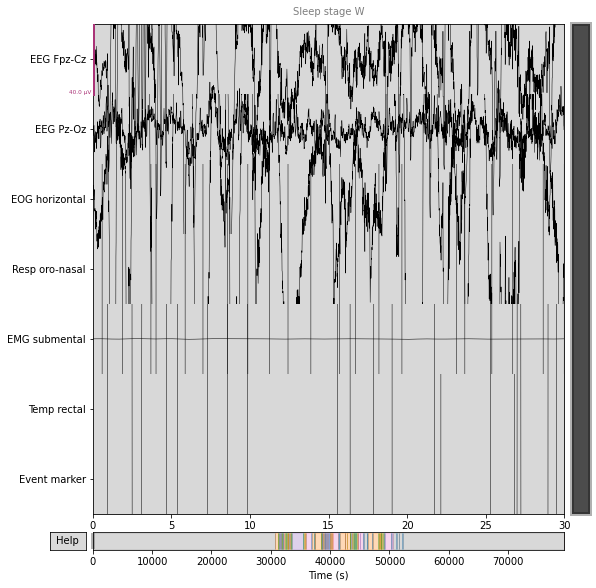

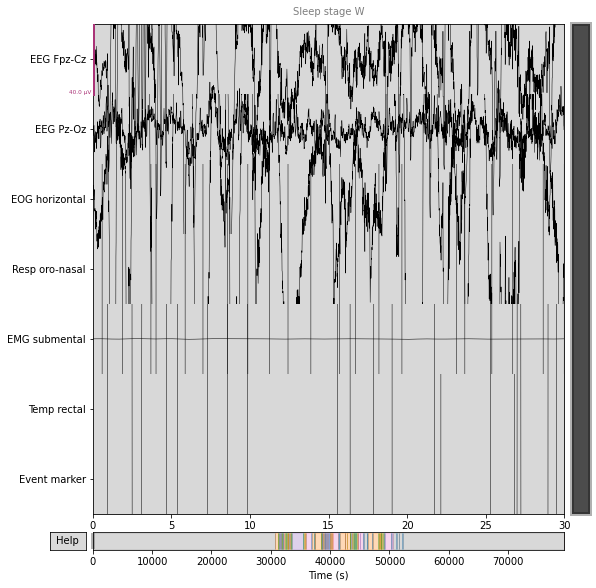

In [4]:
raw.plot(start=0,duration=30)

In [5]:
data = raw.get_data()
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [6]:
annot_df = annot.to_data_frame()
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


In [7]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1,'Movement time':-1}
annot_df['description'] = annot_df['description'].replace(label)
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [8]:
annot_df.groupby(['description']).sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [9]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = int(annot_df.iloc[i,2])
    for j in range(0,dur):
        annot_list.append(des)

In [10]:
cols = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=cols)
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [11]:
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


In [12]:
df_stats = df.describe()

In [13]:
df_stats = df_stats.transpose()

In [14]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,79500.0,1.811138e-07,2.561919e-05,-0.000125,-0.000012,5.157509e-07,0.000013,0.000157
1,79500.0,-3.464879e-07,7.185456e-06,-0.000048,-0.000005,-4.520147e-07,0.000004,0.000056
2,79500.0,7.427894e-07,8.184781e-05,-0.000386,-0.000036,-2.463980e-07,0.000035,0.000445
3,79500.0,2.772545e+02,3.497052e+02,-907.900006,181.378693,2.211806e+02,317.617642,2015.034675
4,79500.0,3.422791e-06,7.126552e-08,0.000003,0.000003,3.422624e-06,0.000003,0.000004
5,79500.0,3.721832e+01,2.517206e-02,37.143711,37.200739,3.721811e+01,37.235538,37.325715
6,79500.0,8.896052e+02,5.765405e+01,-2.770382,879.616700,8.935192e+02,907.264523,1021.897795


In [15]:
def norm(x):
    return (x - df_stats['mean']) / df_stats['std']

df = norm(df)

In [16]:
df

,0,1,2,3,4,5,6
0,0.188754,-0.295167,0.192624,-2.171127,1.813066,-0.471340,0.527193
1,-0.107727,0.252439,0.186603,-2.158298,1.834960,-0.483177,0.514208
2,0.046004,-0.522223,0.108332,-2.144797,1.856496,-0.494663,0.501203
3,-0.100406,-0.321880,0.011998,-2.130625,1.877656,-0.505789,0.488190
4,-0.210214,-0.054755,0.084248,-2.115783,1.898424,-0.516544,0.475179
...,...,...,...,...,...,...,...
79495,1.283172,1.534638,0.005977,-0.250008,0.946352,1.383297,0.273597
79496,2.589885,1.320938,0.011998,-0.252169,0.930013,1.379503,0.272446
79497,0.975710,1.160663,-0.385380,-0.254344,0.913086,1.375822,0.271212
79498,1.250230,1.107238,-0.656320,-0.256533,0.895582,1.372258,0.269895


In [17]:
df.iloc[0,0]

0.18875446192609638

In [18]:
df.iloc[0,1]

-0.2951672478131336

In [26]:
a = annot_list.values

In [30]:
a[20000][0]

0

In [31]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []

for i in range(0,79500):
    if(a[i][0] == 0):
        X0.append(df.iloc[i,0])
        X1.append(df.iloc[i,1])
        X2.append(df.iloc[i,2])
        X3.append(df.iloc[i,3])
        X4.append(df.iloc[i,4])
        X5.append(df.iloc[i,5])
        X6.append(df.iloc[i,6])


In [32]:
X0

[0.18875446192609638,
 -0.10772661428188687,
 0.04600431412225258,
 -0.10040609388168976,
 -0.2102138998846465,
 -0.2980601446870119,
 -0.331002486487899,
 -0.2760985834864206,
 -0.15164973668306955,
 -0.04550219088021138,
 0.07894665592313958,
 0.07162613552294249,
 0.05698509472254826,
 -0.11138687448198545,
 -0.038181670480014265,
 0.04600431412225258,
 0.1045684773238295,
 -0.09308557348149266,
 0.013061972321365552,
 0.2216968037269834,
 -0.07478427248099985,
 -0.12602791528237967,
 0.1045684773238295,
 0.2985622679290531,
 0.10822873752392806,
 -0.04550219088021138,
 -0.08210479288119697,
 -0.26877806308622343,
 -0.30172040488711044,
 -0.19557285908425226,
 -0.4993744556924326,
 -0.36760508848888457,
 -0.488393675092137,
 -0.331002486487899,
 -0.6457848636963749,
 -0.8324581339014014,
 -0.9312851593040625,
 -0.8361183941015,
 -0.7958555319004158,
 -0.9349454195041612,
 -1.026451924506625,
 -1.0081506235061324,
 -1.026451924506625,
 -1.0484134857072165,
 -0.8983428175031756,
 -0.8

In [33]:
X1

[-0.2951672478131336,
 0.25243869592402224,
 -0.5222233708261007,
 -0.32187973287348265,
 -0.054754882269992006,
 -0.1482485799812137,
 -0.08146736733034107,
 0.30586366604472043,
 -0.06811112480016653,
 -0.06811112480016653,
 -1.430447862877969,
 -1.8177788962530301,
 -1.457160347938318,
 -0.5489358558864497,
 -0.428729673114879,
 -0.37530470299418084,
 -0.1749610650415628,
 -1.0698293145632565,
 -0.7626357363692422,
 -0.9896918593822094,
 -0.4687984007054026,
 -0.22838603516226094,
 -0.428729673114879,
 -1.4438041054081434,
 -1.5506540456495395,
 -1.1633230122744784,
 -0.33523597540365724,
 -0.33523597540365724,
 -0.32187973287348265,
 0.13223251315245146,
 0.5997010017085602,
 -0.13489233745103918,
 -0.3085234903433081,
 -0.22838603516226094,
 -0.7359232513088931,
 -0.04139863973981746,
 0.26579493845419677,
 -0.054754882269992006,
 0.2257262108636732,
 -0.7626357363692422,
 0.10552002809210241,
 0.26579493845419677,
 0.6531259718292584,
 0.45278233387664024,
 0.03873881544122974,
 

In [34]:
X2

[0.19262432371264968,
 0.18660344091108502,
 0.1083319644907441,
 0.011997839665709146,
 0.08424843328448536,
 0.024039605268838516,
 -0.006064808738984911,
 -0.01810657434211428,
 0.005976956864144461,
 0.054144019276661945,
 -0.03616922274680834,
 -0.07229451955619645,
 -0.0963780507624552,
 -0.08433628515932583,
 -0.07831540235776115,
 -0.10841981636558456,
 -0.1866912927859255,
 -0.09035716796089051,
 -0.22281658959531359,
 -0.19873305838905483,
 -0.13250334757184332,
 -0.15056599597653736,
 -0.0963780507624552,
 -0.1866912927859255,
 -0.20475394119061954,
 -0.1746495271827961,
 -0.3071089488172192,
 -0.2589418864047017,
 -0.28302541761096045,
 -0.252921003603137,
 -0.2709836520078311,
 -0.3612968940313014,
 -0.3071089488172192,
 -0.28904630041252516,
 -0.2589418864047017,
 -0.22883747239687827,
 -0.34925512842817197,
 -0.252921003603137,
 -0.28904630041252516,
 -0.20475394119061954,
 -0.22281658959531359,
 -0.28904630041252516,
 -0.19873305838905483,
 -0.252921003603137,
 -0.16260

In [35]:
X3

[-2.1711273559429594,
 -2.1582975273966745,
 -2.1447969647047844,
 -2.1306254234278166,
 -2.1157830346480617,
 -2.1002703093754667,
 -2.084088142704884,
 -2.0672378177197657,
 -2.0497210091376106,
 -2.031539786692605,
 -2.012696618251144,
 -1.9931943726560628,
 -1.9730363222956482,
 -1.9522261453936771,
 -1.9307679280169354,
 -1.9086661657968915,
 -1.8859257653624053,
 -1.862552045480552,
 -1.8385507379028938,
 -1.8139279879147072,
 -1.7886903545849382,
 -1.7628448107148582,
 -1.7363987424836227,
 -1.7093599487891777,
 -1.6817366402831773,
 -1.6535374380988062,
 -1.6247713722706558,
 -1.5954478798460114,
 -1.5655768026871635,
 -1.535168384964586,
 -1.5042332703410684,
 -1.4727824988471154,
 -1.4408275034481908,
 -1.4083801063045862,
 -1.375452514724979,
 -1.3420573168149368,
 -1.3082074768219125,
 -1.2739163301784617,
 -1.239197578245702,
 -1.2040652827592337,
 -1.1685338599799935,
 -1.1326180745527472,
 -1.0963330330751542,
 -1.0596941773805773,
 -1.0227172775380273,
 -0.9854184245728

In [36]:
X4

[1.8130659163404235,
 1.8349600569823705,
 1.8564958300024326,
 1.8776562234318401,
 1.8984244035792253,
 1.918783728187181,
 1.9387177595290384,
 1.9582102774351542,
 1.9772452922386325,
 1.995807057629819,
 2.0138800834092803,
 2.031449148128772,
 2.048499311610098,
 2.0650159273309803,
 2.080984654668367,
 2.096391470988201,
 2.1112226835718606,
 2.1254649413691786,
 2.1391052465676177,
 2.1521309659680226,
 2.1645298421566914,
 2.176290004464368,
 2.1873999797020027,
 2.1978487026641527,
 2.2076255263902884,
 2.2167202321747923,
 2.225123039316442,
 2.2328246145984796,
 2.239816081490131,
 2.2460890290612134,
 2.251635520601072,
 2.256448101933532,
 2.2605198094198378,
 2.2638441776414684,
 2.2664152467551877,
 2.2682275695128102,
 2.2692762179381942,
 2.2695567896546156,
 2.269065413855517,
 2.2677987569120543,
 2.265754027611077,
 2.2629289820174936,
 2.2593219279550576,
 2.254931729100175,
 2.249757808683203,
 2.243800152792429,
 2.237059313275924,
 2.2295364102367707,
 2.221233

In [37]:
X5

[-0.47133967902574,
 -0.4831766600024113,
 -0.4946632822649691,
 -0.5057890587189885,
 -0.5165438055654297,
 -0.5269176498895844,
 -0.5369010369725489,
 -0.5464847373125167,
 -0.5556598533573058,
 -0.5644178259379573,
 -0.5727504404022756,
 -0.5806498324443597,
 -0.5881084936222214,
 -0.5951192765637715,
 -0.6016753998560953,
 -0.6077704526177339,
 -0.6133983987429611,
 -0.6185535808276572,
 -0.6232307237632256,
 -0.6274249380053314,
 -0.6311317225075785,
 -0.6343469673277502,
 -0.6370669558975768,
 -0.6392883669585738,
 -0.6410082761679016,
 -0.6422241573629536,
 -0.6429338834962504,
 -0.6431357272332962,
 -0.6428283612215864,
 -0.6420108580191923,
 -0.6406826897009886,
 -0.638843727127562,
 -0.6364942388923279,
 -0.6336348899372573,
 -0.6302667398493497,
 -0.6263912408344683,
 -0.6220102353727683,
 -0.6171259535616479,
 -0.6117410101428344,
 -0.6058584012277186,
 -0.5994815007124698,
 -0.5926140564012792,
 -0.5852601858261582,
 -0.5774243717819216,
 -0.5691114575743803,
 -0.560326641

In [38]:
X6

[0.5271927431294036,
 0.514207862637318,
 0.5012031691996002,
 0.4881897256187943,
 0.4751785070318042,
 0.4621803920532646,
 0.4492061540813281,
 0.4362664527721457,
 0.423371825689274,
 0.4105326801337093,
 0.39775928516049763,
 0.3850617637872499,
 0.3724500853999118,
 0.35993405836094,
 0.34752332282455,
 0.33522734376390895,
 0.3230554042145004,
 0.31101659873796184,
 0.2991198271102743,
 0.28737378823813203,
 0.27578697430689175,
 0.2643676651634554,
 0.25312392293707403,
 0.24206358690083535,
 0.2311942685765343,
 0.22052334708508228,
 0.21005796474468275,
 0.19980502291852667,
 0.18977117811369143,
 0.17996283833263169,
 0.17038615967827755,
 0.16104704321386995,
 0.15195113207797098,
 0.14310380885525473,
 0.13451019320318872,
 0.12617513973465752,
 0.11810323615620302,
 0.11029880166143763,
 0.10276588557892474,
 0.09550826627355204,
 0.08852945030033298,
 0.08183267180918519,
 0.07542089219909628,
 0.06929680001997959,
 0.06346281112007798,
 0.05792106903679822,
 0.052673445

In [39]:
import scipy.stats as st

In [42]:
st.t.interval(alpha=0.90, df=len(X0)-1,
              loc=np.mean(X0),
              scale=st.sem(X0))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/717390456.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X0)-1,


(-0.004363698938999458, 0.008680044252350146)

In [43]:
st.t.interval(alpha=0.90, df=len(X1)-1,
              loc=np.mean(X1),
              scale=st.sem(X1))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/3723661251.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X1)-1,


(-0.006643680831073248, 0.006984608067390338)

In [44]:
st.t.interval(alpha=0.90, df=len(X2)-1,
              loc=np.mean(X2),
              scale=st.sem(X2))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/2606998258.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X2)-1,


(-0.003753879290868389, 0.009595858309426742)

In [45]:
st.t.interval(alpha=0.90, df=len(X3)-1,
              loc=np.mean(X3),
              scale=st.sem(X3))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/3860025406.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X3)-1,


(0.0030802951249527437, 0.018531734145207108)

In [46]:
st.t.interval(alpha=0.90, df=len(X4)-1,
              loc=np.mean(X4),
              scale=st.sem(X4))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/1715302051.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X4)-1,


(0.09340889407394475, 0.10714321102777731)

In [47]:
st.t.interval(alpha=0.90, df=len(X5)-1,
              loc=np.mean(X5),
              scale=st.sem(X5))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/3134699342.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X5)-1,


(0.07421382047129879, 0.088541498067267)

In [48]:
st.t.interval(alpha=0.90, df=len(X6)-1,
              loc=np.mean(X6),
              scale=st.sem(X6))

C:\Users\HP\AppData\Local\Temp/ipykernel_7272/2686493811.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X6)-1,


(0.002795506991672322, 0.0180198841456587)